# Documentation

# Imports

In [3]:
# OS tools
import os
from glob import glob
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker as mticker
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import util as cutil
from cartopy.mpl.ticker import LongitudeLocator, LatitudeLocator
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import mjo_mean_state_diagnostics as mjo

# Plot model data

In [1]:
models_list = [
    'ACCESS-CM2',
    'ACCESS-ESM1-5', 
    'BCC-CSM2-MR',
    'CanESM5', 
    'CNRM-CM6-1', 
    'HadGEM3-GC31-LL', 
    'IPSL-CM6A-LR', 
    'MIROC6', 
    'MRI-ESM2-0',
    'NorESM2-LM'
]

experiments_list = [
    'historical', 
    'ssp245',
    'hist-nat', 
    'hist-GHG'
]

# Specify reference period
reference_period = dict(year=slice(1981,2010))

# Define korea peninsula for land data
korean_peninsula = dict(lat=slice(34, 38), lon=slice(125, 130))

# Define area for SST data
korea_west = 117.5
korea_east = 135
korea_south = 30
korea_north = 42.5

korea_sst_region = dict(lat=slice(30, 42.5), lon=slice(117.5, 135))
south_china_region = dict(lat=slice(25, 35), lon=slice(100, 120))

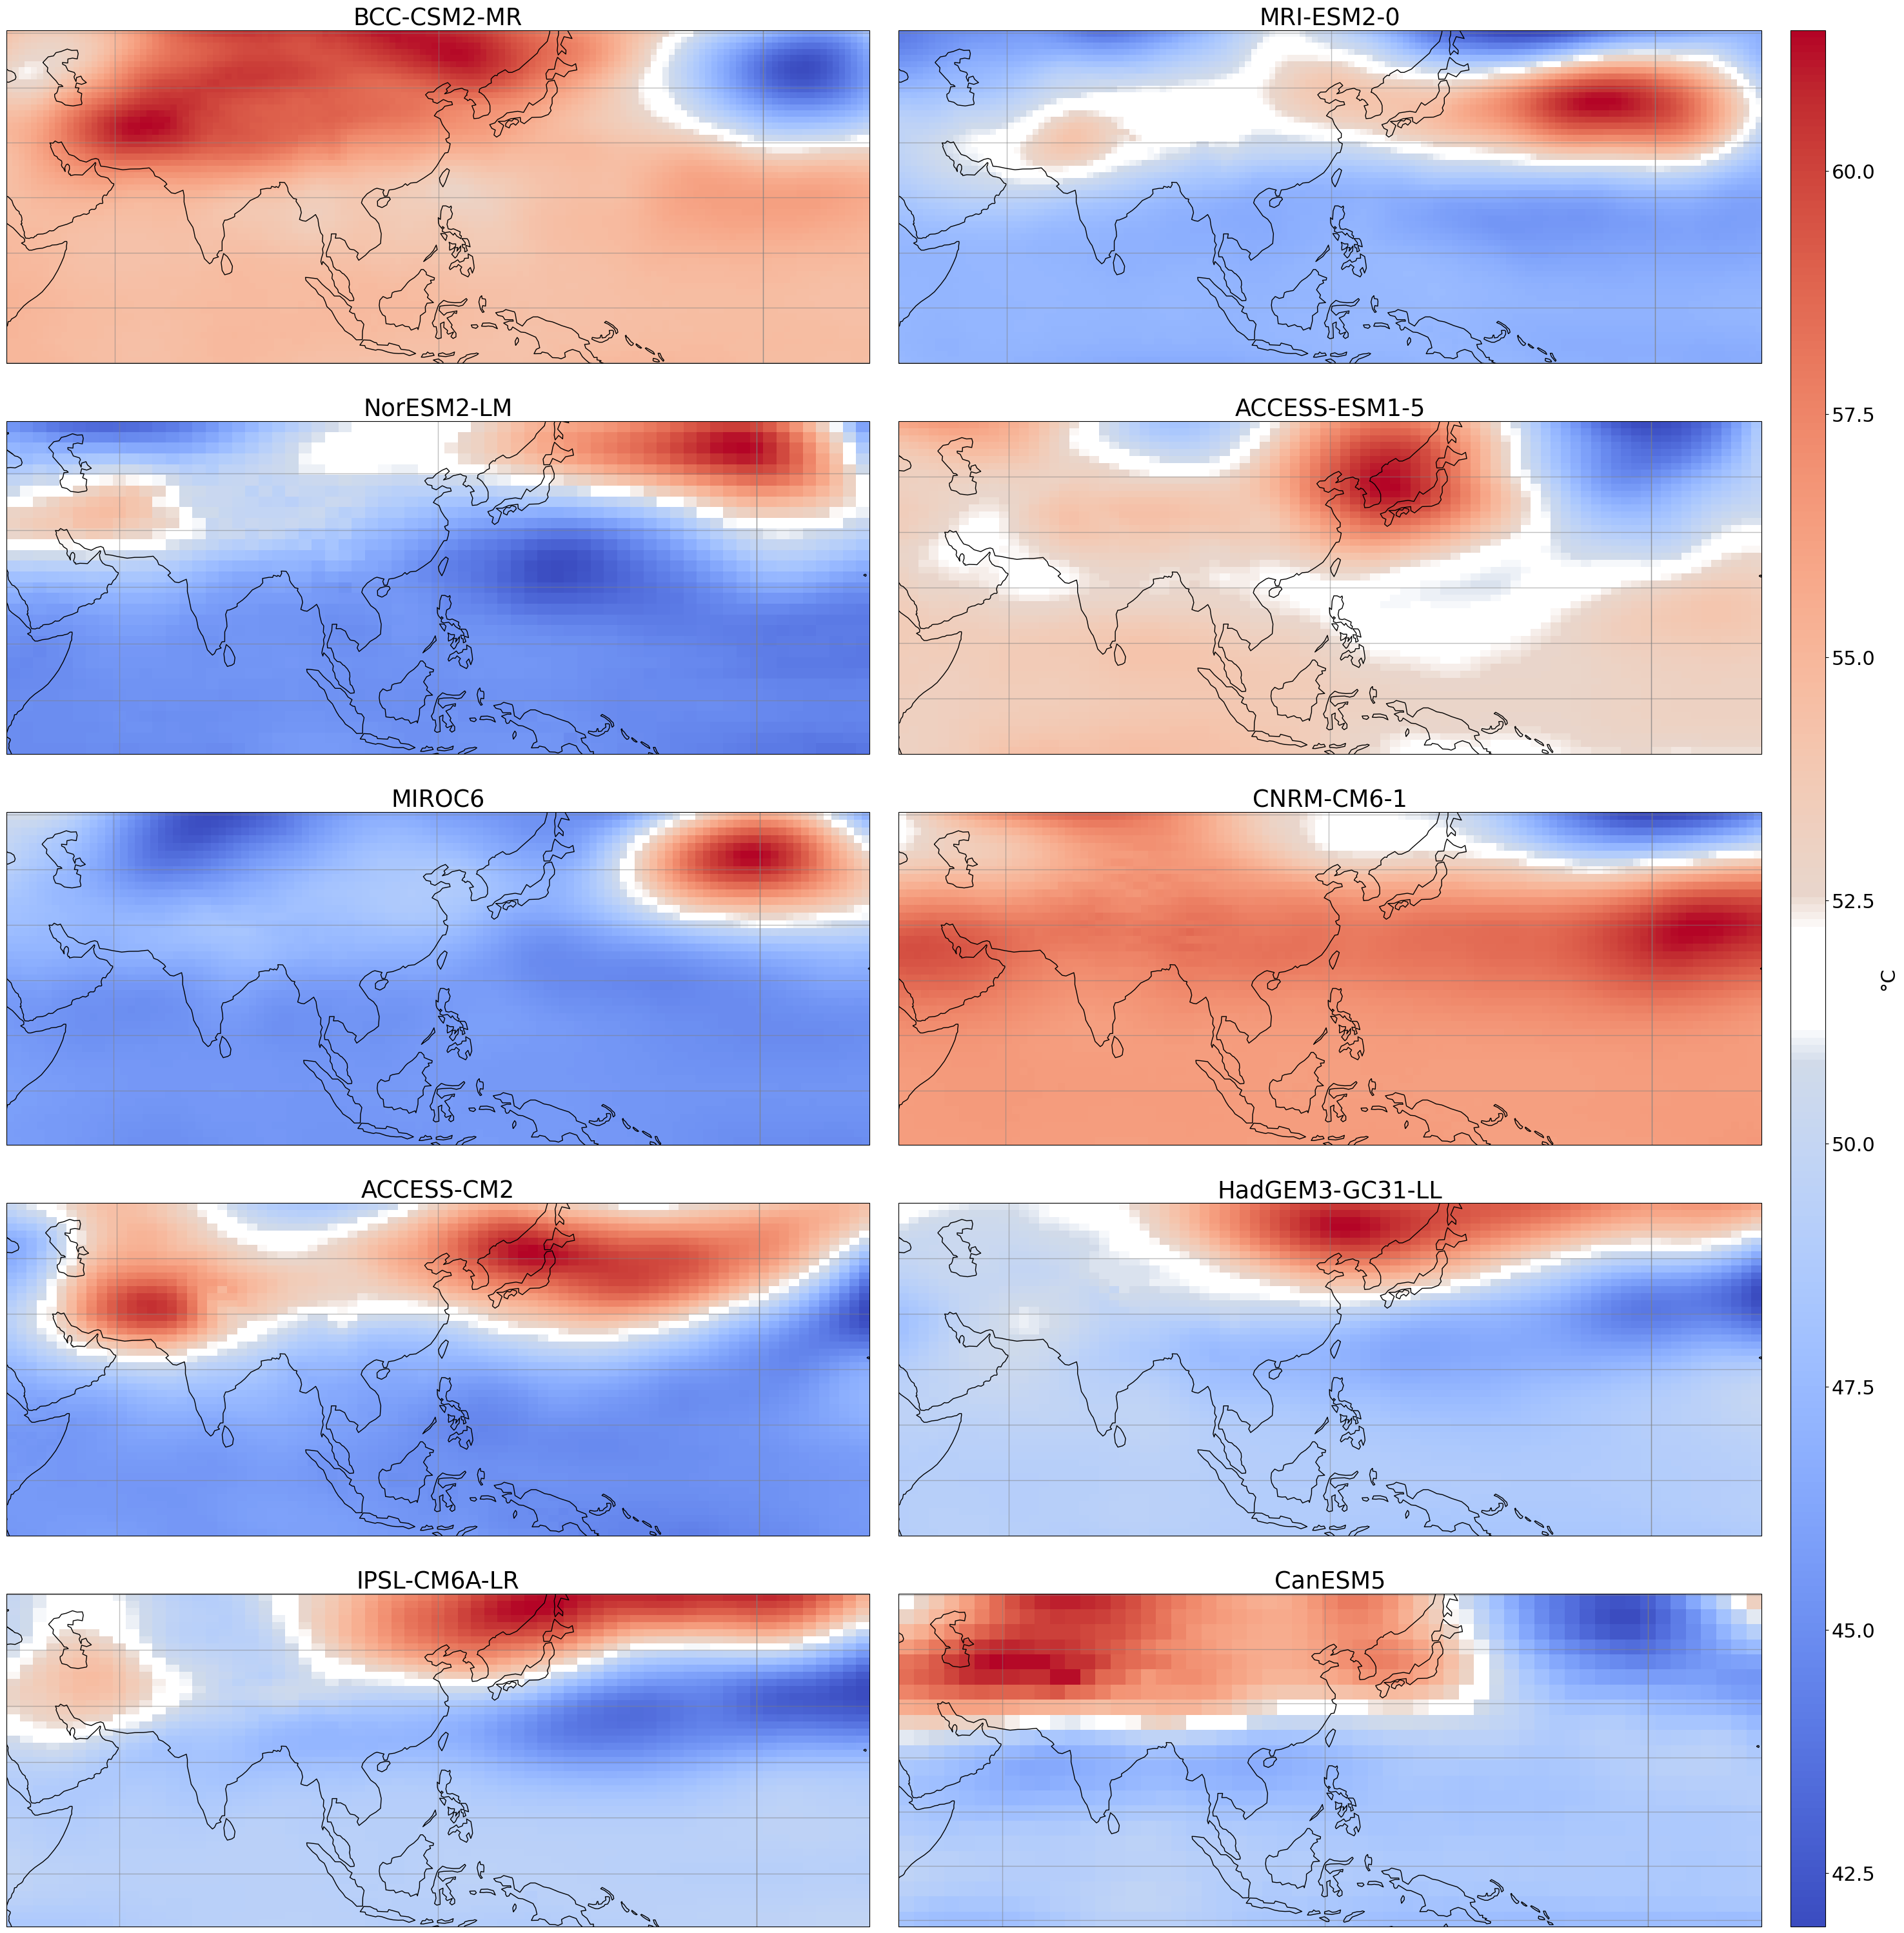

In [61]:
# models_list = ['ACCESS-ESM1-5', 'CanESM5', 'CNRM-CM6-1', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0']

# Alphabetical order
# models_list = [
#     'ACCESS-CM2',
#     'ACCESS-ESM1-5', 
#     'BCC-CSM2-MR',
#     'CanESM5', 
#     'CNRM-CM6-1', 
#     'HadGEM3-GC31-LL', 
#     'IPSL-CM6A-LR', 
#     'MIROC6', 
#     'MRI-ESM2-0',
#     'NorESM2-LM'
# ]

# Sorted from lowest to highest by ΔSST in hist - nat
models_list = [
    'BCC-CSM2-MR',
    'MRI-ESM2-0', 
    'NorESM2-LM',
    'ACCESS-ESM1-5', 
    'MIROC6', 
    'CNRM-CM6-1', 
    'ACCESS-CM2',
    'HadGEM3-GC31-LL', 
    'IPSL-CM6A-LR', 
    'CanESM5'
]

korea_south = -10
korea_north = 50
korea_west = 40
korea_east = 200

korea_sst_region = dict(lat=slice(-10,50), lon=slice(40,200))

variable = 'zg'

plt.style.use('default')
plt.rcParams.update({'font.size':22})

fig = plt.figure(figsize=(30,30))
# gs = GridSpec(10,2, width_ratios=[100,2], figure=fig)
# gs.update(left=0.01, right=0.95, bottom=0.01, top=0.99, wspace=0.05, hspace=0.175)

# ax = []
# ax.append(fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[3,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[4,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[5,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[6,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[7,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[8,0], projection=ccrs.PlateCarree(central_longitude=120)))
# ax.append(fig.add_subplot(gs[9,0], projection=ccrs.PlateCarree(central_longitude=120)))

gs = GridSpec(5,3, width_ratios=[50,50,2], figure=fig)
gs.update(left=0.01, right=0.95, bottom=0.01, top=0.99, wspace=0.05, hspace=0.175)

ax = []
ax.append(fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[3,0], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[3,1], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[4,0], projection=ccrs.PlateCarree(central_longitude=120)))
ax.append(fig.add_subplot(gs[4,1], projection=ccrs.PlateCarree(central_longitude=120)))

cbar_ax = fig.add_subplot(gs[:,-1])

for index, model in enumerate(models_list):
    os.chdir('/home/disk/tc/pangulo/CMIP6/' + model)

    # Load the data
    file_name_historical = sorted(glob('./historical/compiled_' + variable + '500_*.nc'))[0]
    [
        variable_historical, 
        frequency_historical, 
        model_name_historical, 
        experiment_historical, 
        variant_historical, 
        grid_historical, 
        period_historical
    ] = file_name_historical.split('/')[-1].split('.nc')[0].split('_')[1:]

    temperature_data_historical = xr.open_dataset(file_name_historical)[variable]
    
    
    ################### ssp245 ###################
    # Load the ssp245 data
    file_name_ssp = sorted(glob('./ssp245/compiled_' + variable + '500_*.nc'))[0]
    [
        variable_ssp, 
        frequency_ssp, 
        model_name_ssp, 
        experiment_ssp, 
        variant_ssp, 
        grid_ssp, 
        period_ssp
    ] = file_name_ssp.split('/')[-1].split('.nc')[0].split('_')[1:]

    temperature_data_ssp = xr.open_dataset(file_name_ssp)[variable]
    
    # Concatenate together the historical data and the ssp data
    # temperature_data_historical = xr.concat((temperature_data_historical, temperature_data_ssp), dim='time')
    period_extended = period_historical.split('-')[0] + '-' + period_ssp.split('-')[-1]
    
    # hist-GHG
    file_name_hist_GHG = sorted(glob('./hist-GHG/compiled_' + variable + '500_*.nc'))[0]
    [
        variable_hist_GHG, 
        frequency_hist_GHG, 
        model_name_hist_GHG, 
        experiment_hist_GHG, 
        variant_hist_GHG, 
        grid_hist_GHG, 
        period_hist_GHG
    ] = file_name_hist_GHG.split('/')[-1].split('.nc')[0].split('_')[1:]

    temperature_data_hist_GHG = xr.open_dataset(file_name_hist_GHG)[variable]
    
    # hist-nat
    file_name_hist_nat = sorted(glob('./hist-nat/compiled_' + variable + '500_*.nc'))[0]
    [
        variable_hist_nat, 
        frequency_hist_nat, 
        model_name_hist_nat, 
        experiment_hist_nat, 
        variant_hist_nat, 
        grid_hist_nat, 
        period_hist_nat
    ] = file_name_hist_nat.split('/')[-1].split('.nc')[0].split('_')[1:]

    temperature_data_hist_nat = xr.open_dataset(file_name_hist_nat)[variable]

    # Subset to Korean region
    temperature_korea_historical = temperature_data_historical.sel(korea_sst_region)
    temperature_korea_ssp = temperature_data_ssp.sel(korea_sst_region)
    temperature_korea_hist_GHG = temperature_data_hist_GHG.sel(korea_sst_region)
    temperature_korea_hist_nat = temperature_data_hist_nat.sel(korea_sst_region)
    
    # Concatenate historical and ssp2245 to get extended 
    temperature_korea_extended = xr.concat((temperature_korea_historical, temperature_korea_ssp), dim='time')
    
    # Calculate SST differences
    temperature_difference_hist_nat = temperature_korea_extended - temperature_korea_hist_nat
    twenty_year_mean_hist_nat = temperature_difference_hist_nat.sel(time=slice('2000','2020')).mean(dim='time')
    
    temperature_difference_GHG_nat = temperature_korea_hist_GHG - temperature_korea_hist_nat
    twenty_year_mean_GHG_nat = temperature_difference_GHG_nat.sel(time=slice('2000','2020')).mean(dim='time')
    
    temperature_difference_hist_GHG = temperature_korea_extended - temperature_korea_hist_GHG
    twenty_year_mean_hist_GHG = temperature_difference_hist_GHG.sel(time=slice('2000','2020')).mean(dim='time')
    
    # Plot SST differences
    cmap_modified = mjo.modified_colormap('coolwarm', 'white', 0.05, 0.05)
    # cmap_modified.set_bad(color='beige')
    ax[index].set_title(model)
    im = ax[index].pcolormesh(
        twenty_year_mean_GHG_nat.lon,
        twenty_year_mean_GHG_nat.lat,
        twenty_year_mean_GHG_nat,
        transform=ccrs.PlateCarree(),
        cmap=cmap_modified,
        # norm=mcolors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2),
        # levels=np.arange(-0.5, 3, 0.1),
        # extend='both'
    )
    
    ax[index].set_aspect('auto')
    
    gl = ax[index].gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1,
        color="gray",
        alpha=0.5,
        linestyle="-"
    )
    
    gl.right_labels=False
    gl.left_labels=False
    
    ax[index].add_feature(cfeature.COASTLINE, zorder=15)
    
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('°C')
plt.show()
# plt.savefig('/home/disk/eos7/sressel/research/CATER-Project/SST_map_GHG_nat.png', dpi=500, bbox_inches='tight')

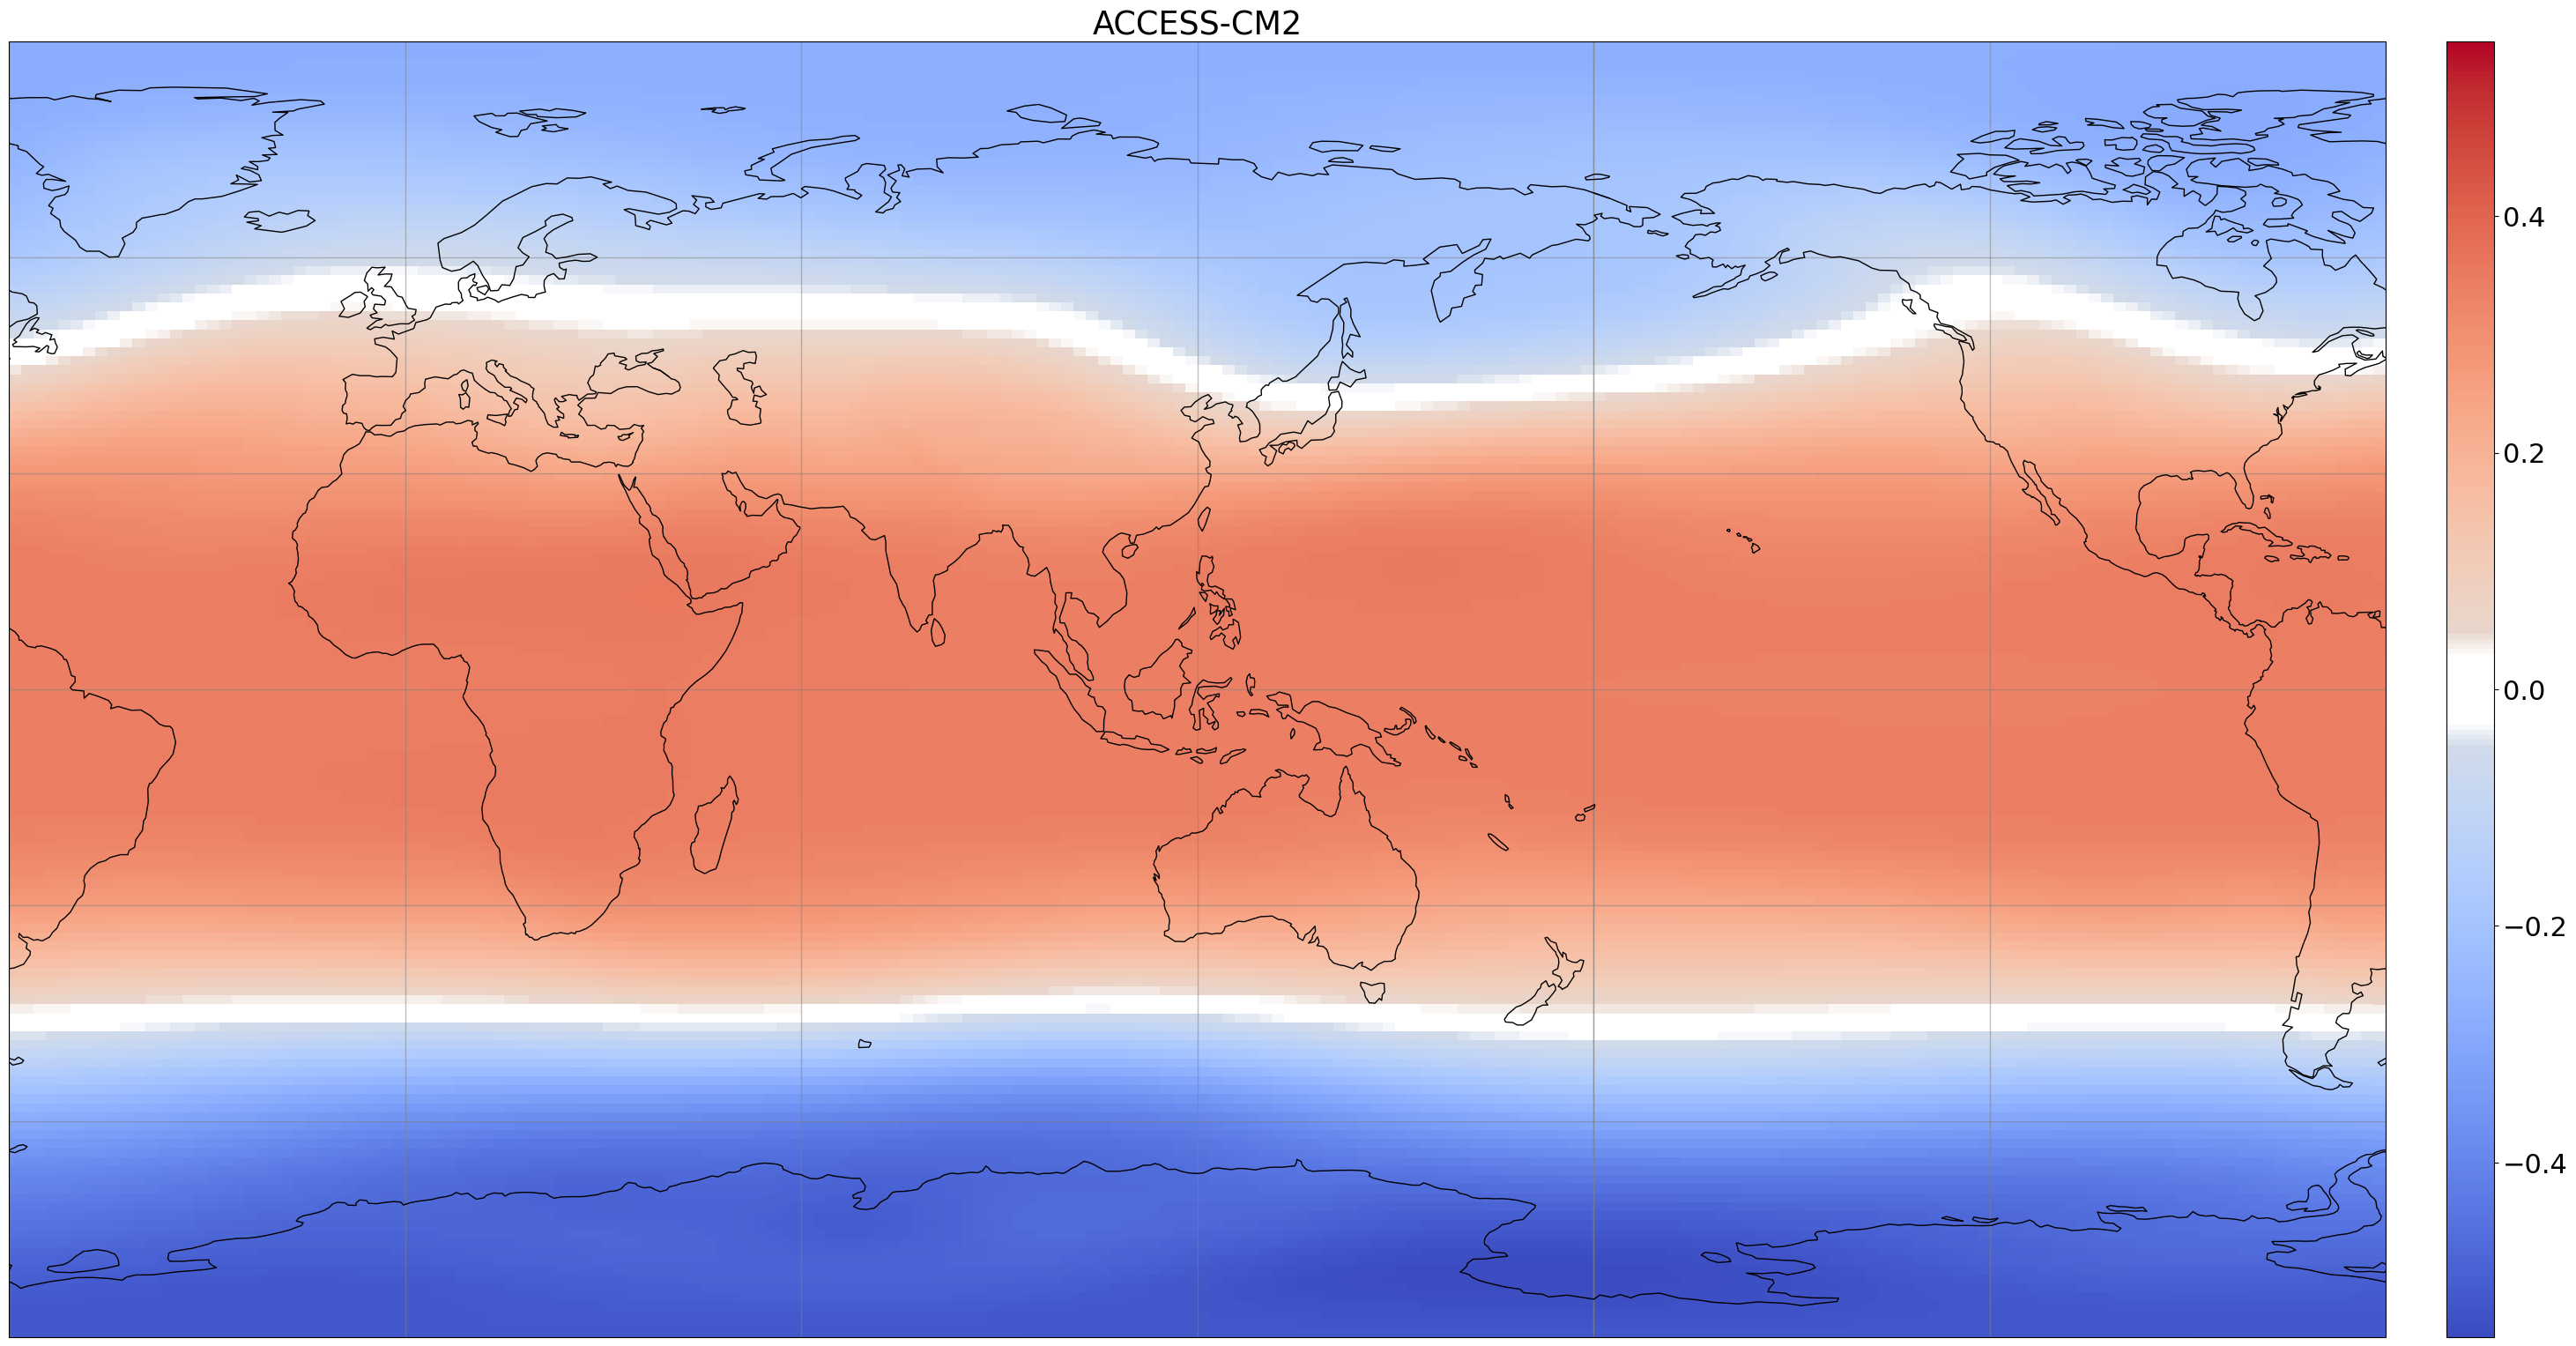

In [35]:
# zg_data_historical.mean(dim='time').plot()
plt.style.use('default')
plt.rcParams.update({'font.size':22})

fig = plt.figure(figsize=(30,15))
gs = GridSpec(1,2, width_ratios=[100,2], figure=fig)
gs.update(left=0.01, right=0.95, bottom=0.01, top=0.99, wspace=0.05, hspace=0.175)

ax = []
ax.append(fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=120)))
cbar_ax = fig.add_subplot(gs[:,-1])

cmap_modified = mjo.modified_colormap('coolwarm', 'white', 0.05, 0.05)
# cmap_modified.set_bad(color='beige')
index = 0
ax[index].set_title(model)
im = ax[index].pcolormesh(
    zg_data_historical.lon,
    zg_data_historical.lat,
    (zg_data_historical.mean(dim='time')-zg_data_historical.mean())/1000,
    transform=ccrs.PlateCarree(),
    cmap=cmap_modified,
    norm=mcolors.CenteredNorm(),
    # norm=mcolors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2),
    # levels=np.arange(-0.5, 3, 0.1),
    # extend='both'
)

ax[index].set_aspect('auto')

gl = ax[index].gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="-"
)

gl.right_labels=False
gl.left_labels=False

ax[index].add_feature(cfeature.COASTLINE, zorder=15)
    
cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.set_label('°C')

In [107]:
greater_region = dict(lat=slice(10,60), lon=slice(60,165))
sea_of_japan_region = dict(lat=slice(35,45), lon=slice(125,140))
south_china_region = dict(lat=slice(25,35), lon=slice(100,120))

model = "NorESM2-LM"

# Load the data
os.chdir(f"/home/disk/tc/pangulo/CMIP6/{model}/")
file_name_historical = sorted(glob('./historical/compiled_zg200_*.nc'))[0]
[
    variable_historical, 
    frequency_historical, 
    model_name_historical, 
    experiment_historical, 
    variant_historical, 
    grid_historical, 
    period_historical
] = file_name_historical.split('/')[-1].split('.nc')[0].split('_')[1:]

zg200_data_historical = xr.open_dataset(file_name_historical)['zg'].sel(korea_sst_region)
zg200_data_historical_sept = zg200_data_historical.sel(time=zg200_data_historical['time.month'].isin([9]))

file_name_ssp = sorted(glob('./ssp245/compiled_zg200_*.nc'))[0]
[
    variable_ssp, 
    frequency_ssp, 
    model_name_ssp, 
    experiment_ssp, 
    variant_ssp, 
    grid_ssp, 
    period_ssp
] = file_name_ssp.split('/')[-1].split('.nc')[0].split('_')[1:]

zg200_data_ssp = xr.open_dataset(file_name_ssp)['zg'].sel(korea_sst_region)
zg200_data_ssp_sept = zg200_data_ssp.sel(time=zg200_data_ssp['time.month'].isin([9]))

zg200_data_extended = xr.concat((zg200_data_historical_sept, zg200_data_ssp_sept), dim='time')

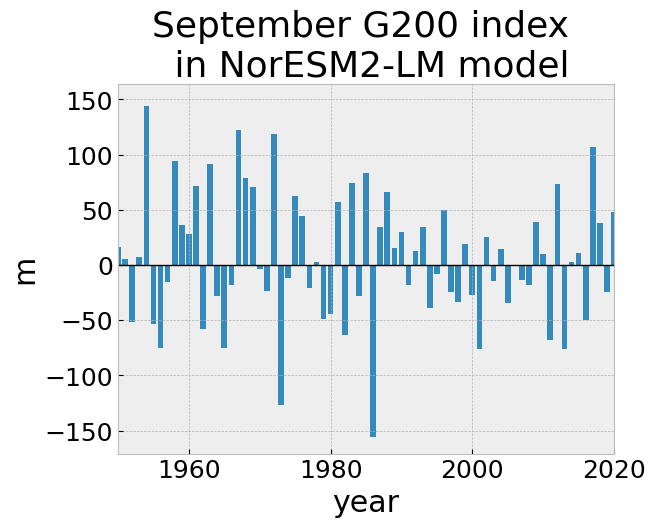

In [112]:
ref_data = zg200_data_extended.sel(time=zg200_data_extended['time.year'].isin(range(1981,2010))).mean(dim='time')
data_anomalies = zg200_data_extended - ref_data

zg200_data_south_china = data_anomalies.sel(south_china_region)
zg200_data_sea_of_japan = data_anomalies.sel(sea_of_japan_region)

G200_index = zg200_data_sea_of_japan.mean(dim=['lat','lon']) - zg200_data_south_china.mean(dim=['lat','lon'])

plt.style.use('bmh')
plt.rcParams.update({'font.size':18})

plt.figure()
plt.title(f"September G200 index \n in {model} model")
plt.bar(G200_index['time.year'], G200_index)
plt.axhline(y=0, color='black', lw=1)

plt.xlim(1950, 2020)
plt.xlabel('year')
plt.ylabel('m')
plt.show()

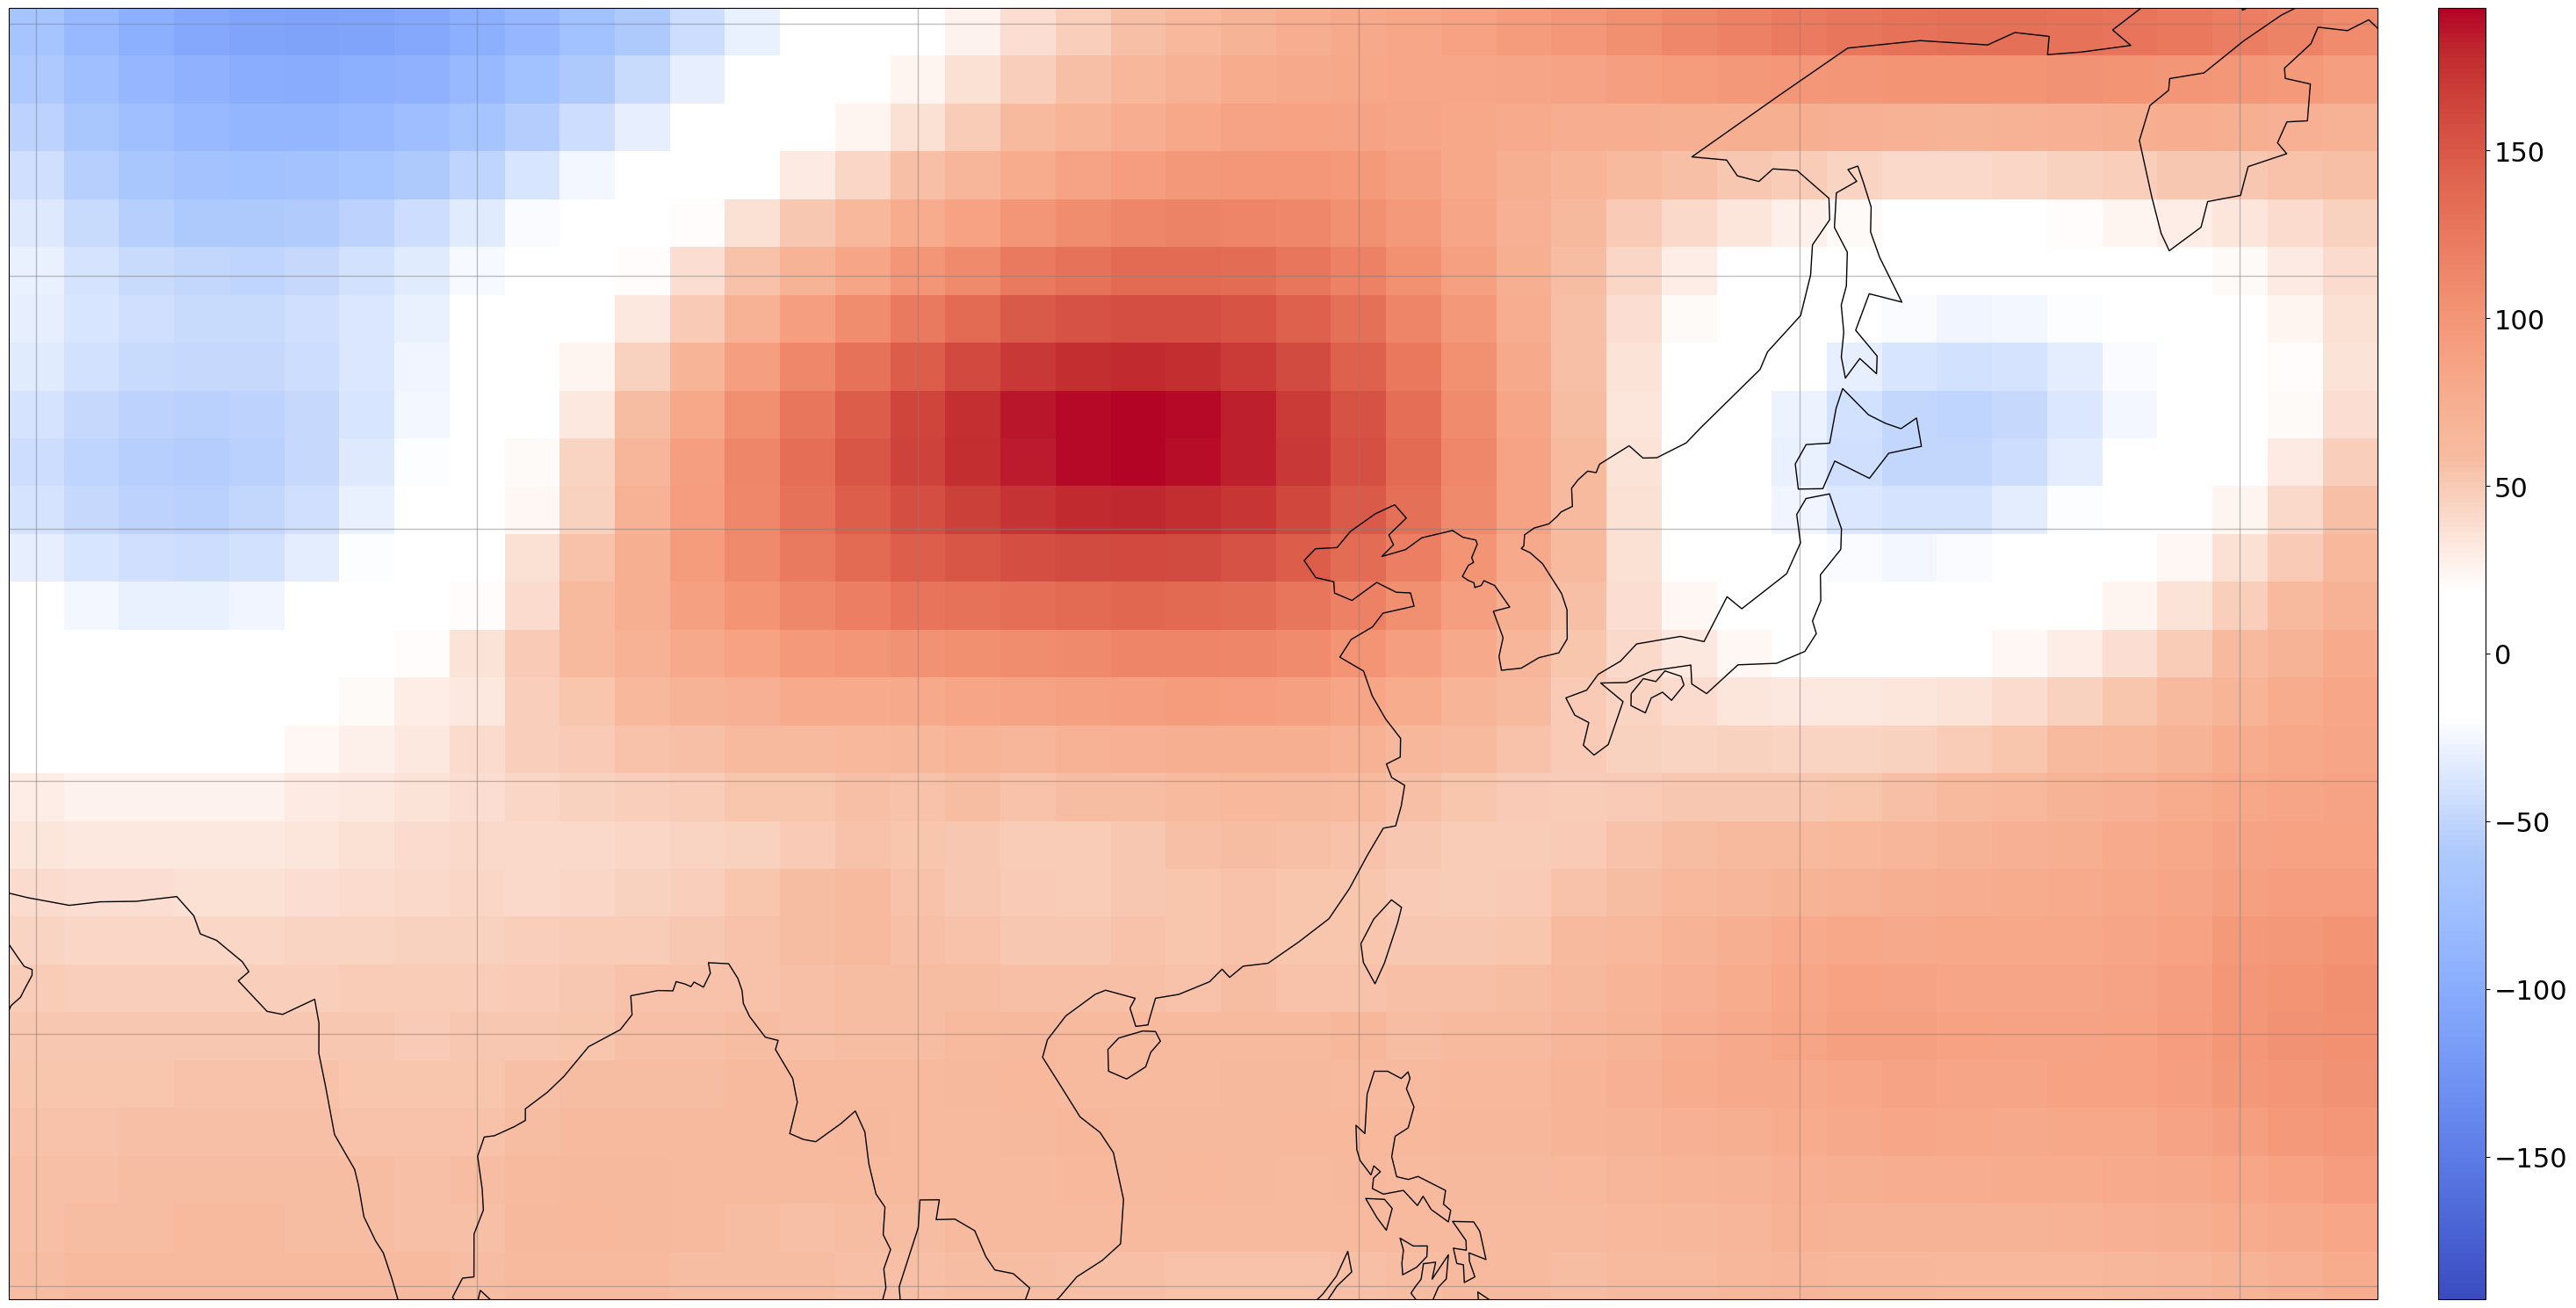

In [92]:
# zg_data_historical.mean(dim='time').plot()
plt.style.use('default')
plt.rcParams.update({'font.size':22})

fig = plt.figure(figsize=(30,15))
gs = GridSpec(1,2, width_ratios=[100,2], figure=fig)
gs.update(left=0.01, right=0.95, bottom=0.01, top=0.99, wspace=0.05, hspace=0.175)

ax = []
ax.append(fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=120)))
cbar_ax = fig.add_subplot(gs[:,-1])

cmap_modified = mjo.modified_colormap('coolwarm', 'white', 0.1, 0.25)
# cmap_modified.set_bad(color='beige')
index = 0
# ax[index].set_title(model)
im = ax[index].pcolormesh(
    data_anomalies.lon,
    data_anomalies.lat,
    data_anomalies.sel(time=data_anomalies['time.year'].isin([2019])).isel(time=0),
    transform=ccrs.PlateCarree(),
    cmap=cmap_modified,
    norm=mcolors.CenteredNorm(),
    # norm=mcolors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2),
    # levels=np.arange(-0.5, 3, 0.1),
    # extend='both'
)

ax[index].set_aspect('auto')

gl = ax[index].gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="-"
)

gl.right_labels=False
gl.left_labels=False

ax[index].add_feature(cfeature.COASTLINE, zorder=15)
    
cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.set_label('°C')